In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import networkx as nx
import functools
import operator
%matplotlib inline 

In [2]:
missing_values=['N','0000-00-00']

In [3]:
people=pd.read_csv('./neurotree/people.tsv', sep='\t', encoding='utf-8',  escapechar='\\', 
                   na_values = missing_values)
connect=pd.read_csv('./neurotree/connect.tsv', sep='\t', encoding='latin-1',  escapechar='\\', 
                    na_values = missing_values)

/home/dhananjay/genealogy/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
connect_remove=connect[~(connect['pid2']==0)].copy()

In [41]:
connect_remove.shape

(631273, 11)

In [5]:
connect_remove['startdate'].isnull().sum()

545799

In [6]:
date_att=['startdate','stopdate']
connect_remove[date_att]=connect_remove[date_att].applymap(lambda x : int(x.split('-')[0]) if pd.notna(x) else x )

In [7]:
def date_processing(date,time=5):
    if pd.isna(date[0]) and pd.notna(date[1]):
        return (date[1]-time)
    else:
        return date[0]
date_pre = functools.partial(date_processing,time=5)

In [8]:
connect_remove['startdate']=connect_remove[['startdate','stopdate']].apply(date_pre, axis=1)

In [9]:
def fecundity_value(pid, connection, time=10):
    #print(pid)
    temp=connection[connection['pid2']==pid].copy()
    temp['startdate']=temp['startdate'].interpolate()
    temp['startdate']=temp['startdate'].fillna(temp['startdate'].mean())
    if (len(temp) > 0) and ~(temp['startdate'].isnull().values.any()):
        temp['startdate']=temp['startdate'].astype(int)
        tmp_list=temp['startdate'].values
        min_year=min(tmp_list)
        max_year=min_year+time
        fecun=len(temp[(temp['startdate'] >= min_year) & (temp['startdate'] <= max_year)])
    else:
        fecun=0
    return fecun

In [10]:
con_uni_pid=pd.unique(connect_remove[['pid1', 'pid2']].values.ravel('K'))
mod_people=people[people['pid'].isin(con_uni_pid)].copy()

In [11]:
%%time
fecun5 = functools.partial(fecundity_value, connection=connect_remove[['pid1','pid2','startdate']],time=10)
mod_people['fecun10']=mod_people['pid'].apply(fecun5)

CPU times: user 24min 12s, sys: 359 ms, total: 24min 13s
Wall time: 24min 12s


(0, 200000)

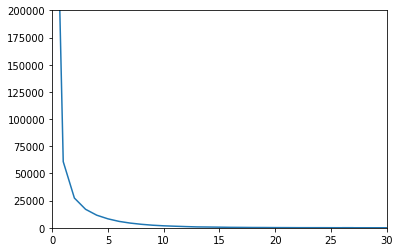

In [32]:
mod_people['fecun10'].value_counts().plot()
plt.xlim(0,30)
plt.ylim(0,200000)

In [33]:
mod_people['fecun10'].value_counts()

0      514233
1       60822
2       27362
3       17026
4       11603
        ...  
68          1
65          1
63          1
62          1
106         1
Name: fecun10, Length: 79, dtype: int64

In [76]:
a=connect_remove[connect_remove['pid2']==68].interpolate()

In [ ]:
a['startdate']=a['startdate'].fillna(a['startdate'].mean()).astype(int)

In [82]:
~a['startdate'].isnull().values.any()

False

In [40]:
mod_people['fecun10'].shape

(664306,)

In [3]:
a= np.random.randn(10)

In [9]:
a[-3:]

array([-1.74157102, -0.59390431,  0.08789953])

In [4]:
a

array([-0.78265068, -1.71857245,  1.48684196,  0.78057287, -0.77489315,
       -1.29037377,  0.48654354, -1.74157102, -0.59390431,  0.08789953])